import imp library

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

datasets(titanic)

In [61]:
df = pd.read_csv('/content/titanic_datasets.csv')

In [62]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [63]:
df = pd.read_csv('/content/titanic_datasets.csv' , usecols=['Age' , 'Survived' , 'Fare'])

In [64]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [65]:
df.isnull().sum()

,0
Survived,0
Age,86
Fare,1


In [66]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

/tmp/ipython-input-4195263108.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
/tmp/ipython-input-4195263108.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [67]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [68]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [69]:
x =df.iloc[:,1:]
y = df.iloc[:,:1]

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [72]:
x_train

,Age,Fare
336,32.00000,13.0000
31,24.00000,31.5000
84,30.27259,10.7083
287,24.00000,82.2667
317,19.00000,10.5000
...,...,...
71,21.00000,7.8958
106,21.00000,7.8208
270,46.00000,75.2417
348,24.00000,13.5000


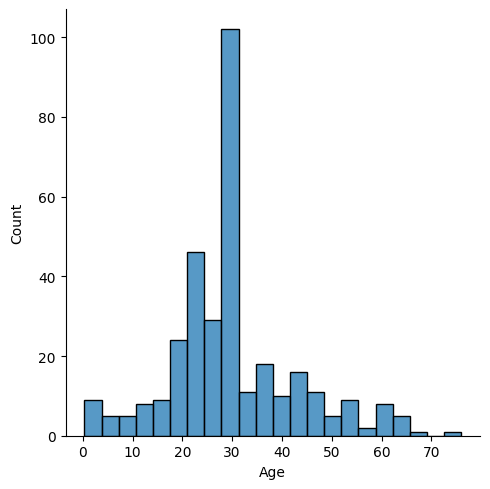

In [73]:

sns.displot(x_train['Age'])

# Function Transformer

In [74]:
from sklearn.preprocessing import FunctionTransformer

Log Transformer

In [75]:
log_transformer = FunctionTransformer(func=np.log1p)

In [76]:
log_transformer.fit_transform(x_train)
log_transformer.transform(x_test)

,Age,Fare
321,3.258097,2.107689
324,3.688879,5.358177
388,3.091042,2.169054
56,3.583519,2.185579
153,3.610918,2.578951
...,...,...
57,3.258097,2.157559
126,3.135494,2.174274
24,3.891820,5.573579
17,3.091042,2.107178


sqr_transformer

In [77]:
sqr_transformer = FunctionTransformer(lambda x : x**2)

In [78]:
sqr_transformer.fit_transform(x_train)
sqr_transformer.transform(x_test)

,Age,Fare
321,625.0,52.261333
324,1521.0,44663.538906
388,441.0,60.062500
56,1225.0,62.343658
153,1296.0,148.432799
...,...,...
57,625.0,58.522500
126,484.0,60.774498
24,2304.0,68840.640625
17,441.0,52.200625


sqr_root_transformer

In [79]:
sqr_root_transformer = FunctionTransformer(np.sqrt)

In [80]:
sqr_root_transformer.fit_transform(x_train)
sqr_root_transformer.transform(x_test)

,Age,Fare
321,5.000000,2.688717
324,6.244998,14.537452
388,4.582576,2.783882
56,5.916080,2.809947
153,6.000000,3.490458
...,...,...
57,5.000000,2.765863
126,4.690416,2.792096
24,6.928203,16.197994
17,4.582576,2.687936


# **POWER TRANSFORMER**

Box-Cox

In [81]:
from sklearn.preprocessing import PowerTransformer

In [82]:
box_cox = PowerTransformer(method='box-cox')

In [83]:
box_cox.fit_transform(x_train+0.000000001)
box_cox.transform(x_test+0.000000001)

array([[-0.34727758, -0.81842492],
       [ 0.70391823,  2.40618683],
       [-0.66942134, -0.76923558],
       [ 0.41350755, -0.75595537],
       [ 0.48675844, -0.4344662 ],
       [ 1.47151638,  0.18886839],
       [-0.03621302, -0.75332007],
       [ 1.40337964,  0.18886839],
       [-0.83543191, -0.38426061],
       [ 0.06074297, -0.74212879],
       [-0.66942134,  0.12450767],
       [ 1.53935708,  0.56710721],
       [-1.09184768, -0.70157492],
       [ 0.70391823,  1.61569954],
       [ 0.06074297, -0.74212879],
       [ 0.06074297,  0.91786511],
       [-0.1130516 , -0.76694387],
       [ 1.80789625,  0.79652565],
       [-1.64009545,  0.28945694],
       [-0.50682284, -0.54741215],
       [ 1.94055959, -0.38426061],
       [ 0.84666548,  0.83258873],
       [-2.39278613, -0.33897427],
       [ 0.04005079, -0.38426061],
       [ 0.06074297, -0.25852995],
       [-0.87751744, -0.81318132],
       [-0.34727758,  0.89898675],
       [ 0.06074297,  0.20727162],
       [ 0.70391823,

Yeo-Johnson

In [84]:
from sklearn.preprocessing import PowerTransformer

In [85]:
yeo_jonson = PowerTransformer()

In [86]:
yeo_jonson.fit_transform(x_train)
yeo_jonson.transform(x_test)

array([[-0.34873796, -0.97766898],
       [ 0.7051842 ,  1.98977775],
       [-0.67191343, -0.89604948],
       [ 0.41416221, -0.87428565],
       [ 0.48757892, -0.38226484],
       [ 1.47377065,  0.39737025],
       [-0.03673254, -0.86998064],
       [ 1.4055842 ,  0.39737025],
       [-0.83845168, -0.31131584],
       [ 0.0604976 , -0.85174925],
       [-0.67191343,  0.32634717],
       [ 1.54165343,  0.77724663],
       [-1.0956232 , -0.78637102],
       [ 0.7051842 ,  1.56850804],
       [ 0.0604976 , -0.85174925],
       [ 0.0604976 ,  1.07944626],
       [-0.11379549, -0.89228553],
       [ 1.81028646,  0.97979767],
       [-1.64467811,  0.50447853],
       [-0.50879119, -0.54759084],
       [ 1.94295348, -0.31131584],
       [ 0.84818551,  1.00992972],
       [-2.38956498, -0.24863036],
       [ 0.03974779, -0.31131584],
       [ 0.0604976 , -0.14028412],
       [-0.88066777, -0.96889281],
       [-0.34873796,  1.06426324],
       [ 0.0604976 ,  0.41731628],
       [ 0.7051842 ,